# Image Offsets - Centroid precision analysis

Tables generated by the previous notebook (Offsets_2) are used to build some statistics associated with centroiding. 

This is a crucial step in drizzle implementation, since we must assure that the pixel offsets created by this process have sufficient precision to even justify drizzling in the first place. Remember that we are using Bayer RGB raw arrays as a source for centroiding, so color effects maybe of importance here.

In [1]:
%pylab notebook
%matplotlib notebook

import os, glob

from scipy import stats
import matplotlib.pyplot as plt

from astropy.table import Table

Populating the interactive namespace from numpy and matplotlib


## Read tables created by previous notebook

In [2]:
dirpath = '../astrophotography_data/MilkyWayPrettyBoy/12800/light/'
file_list = sort(glob.glob(dirpath + '*.offsets_table.fits'))
table_list = [Table.read(x) for x in file_list]

## Plot centroids

Plot centroid (Y against X) as a function of time (or image number in sequence) to gauge the precision to which we can recover the centroid from the highly under-sampled data.

The plots are consistent with precision of a fraction of one pixel. They seem to warrant the use of drizzle.

In [3]:
def plot_residuals(x, y, table_list):

    # last table in sequence 
    table_last = table_list[-1]

    # find in last table, the row corresponding to the input star, 
    # based on centroid column
    tol = 2.0 # tolerance
    found = False
    for row_index in range(len(table_last)):
        xcent = table_last['xcentroid'][row_index]
        ycent = table_last['ycentroid'][row_index]

        if (abs(x - xcent) < tol and abs( y - ycent) < tol):
            found = True
            break

    if not found:
        raise RuntimeError("Cannot find star at ", x, y)
        
    # collect all centroid measurements of the given star
    x_data = []
    y_data = []
    for table_object in reversed(table_list):
    
        x_data.append(table_object['xcentroid'][row_index])
        y_data.append(table_object['ycentroid'][row_index])

        # update row index to point to previous' table row that 
        # corresponds to this star.
        row_index = table_object['prev_row'][row_index]

    # fit straight line and compute residuals
    x_data = np.asarray(x_data)
    y_data = np.asarray(y_data)

    slope, intercept, r_value, p_value, std_err = stats.linregress(x_data, y_data)

    pred_values = slope * x_data + intercept
    residuals = y_data - pred_values

    # plot
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(8.5, 3.5)
    
    for xp,yp,r in zip(x_data, y_data, residuals):
        ax1.plot(xp, yp, 'ro')
        ax2.plot(xp, r, 'ro')

    ax1.grid()
    ax2.grid()
    fig.show()

<IPython.core.display.Javascript object>


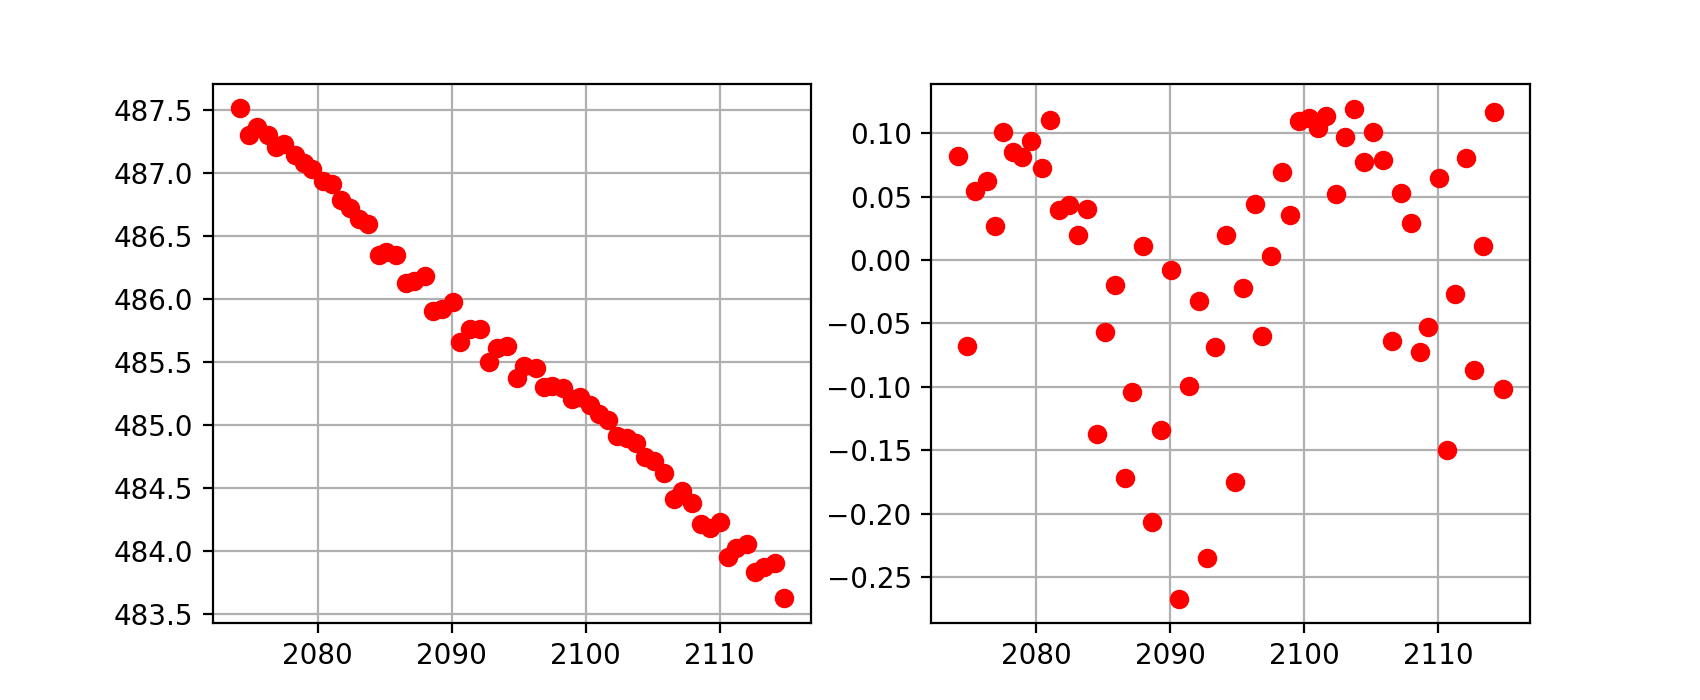

In [4]:

# star coordinates
x = 2074
y = 487
plot_residuals(x, y, table_list)

<IPython.core.display.Javascript object>


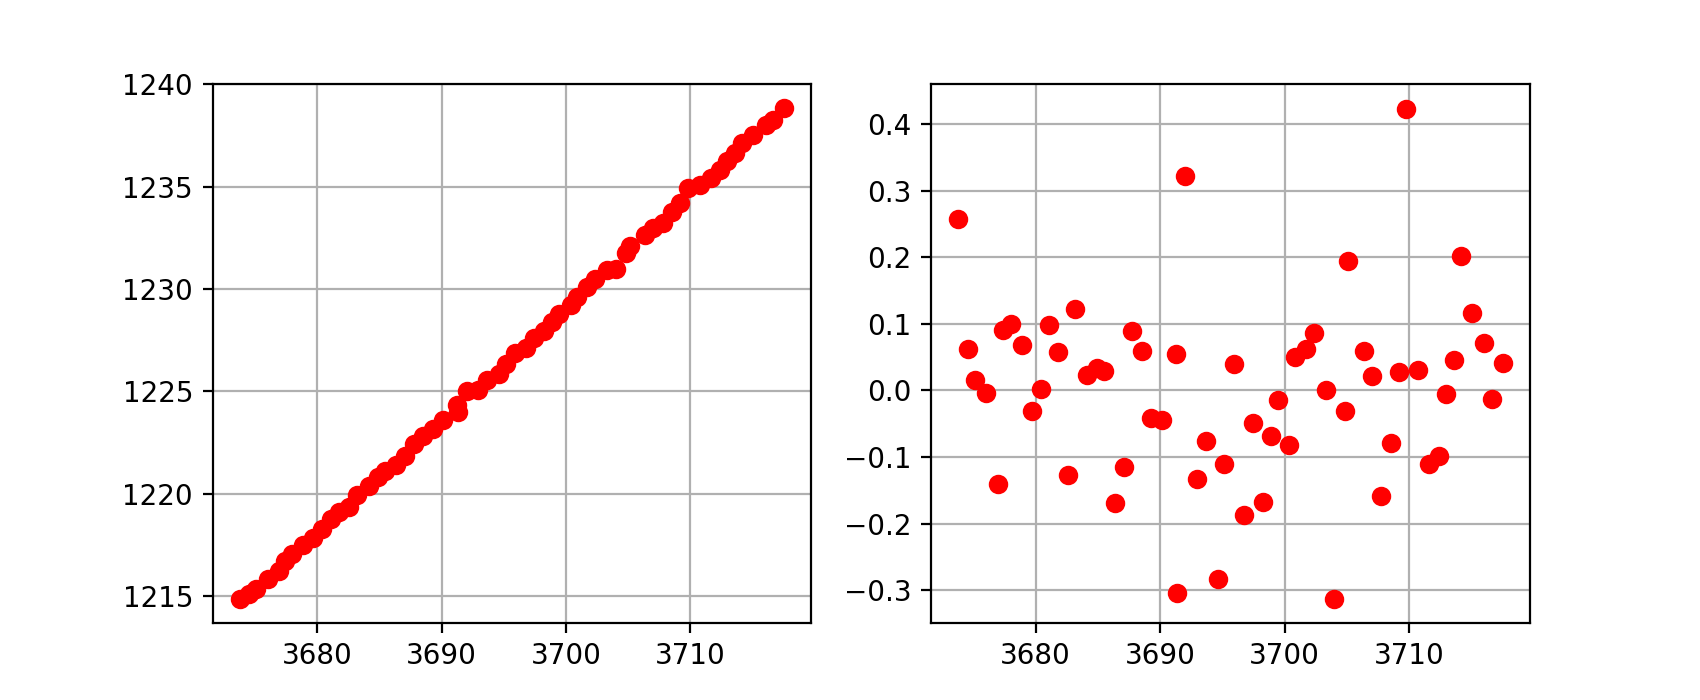

In [5]:
x0 = 3674
y0 = 1214
plot_residuals(x0, y0, table_list)

<IPython.core.display.Javascript object>


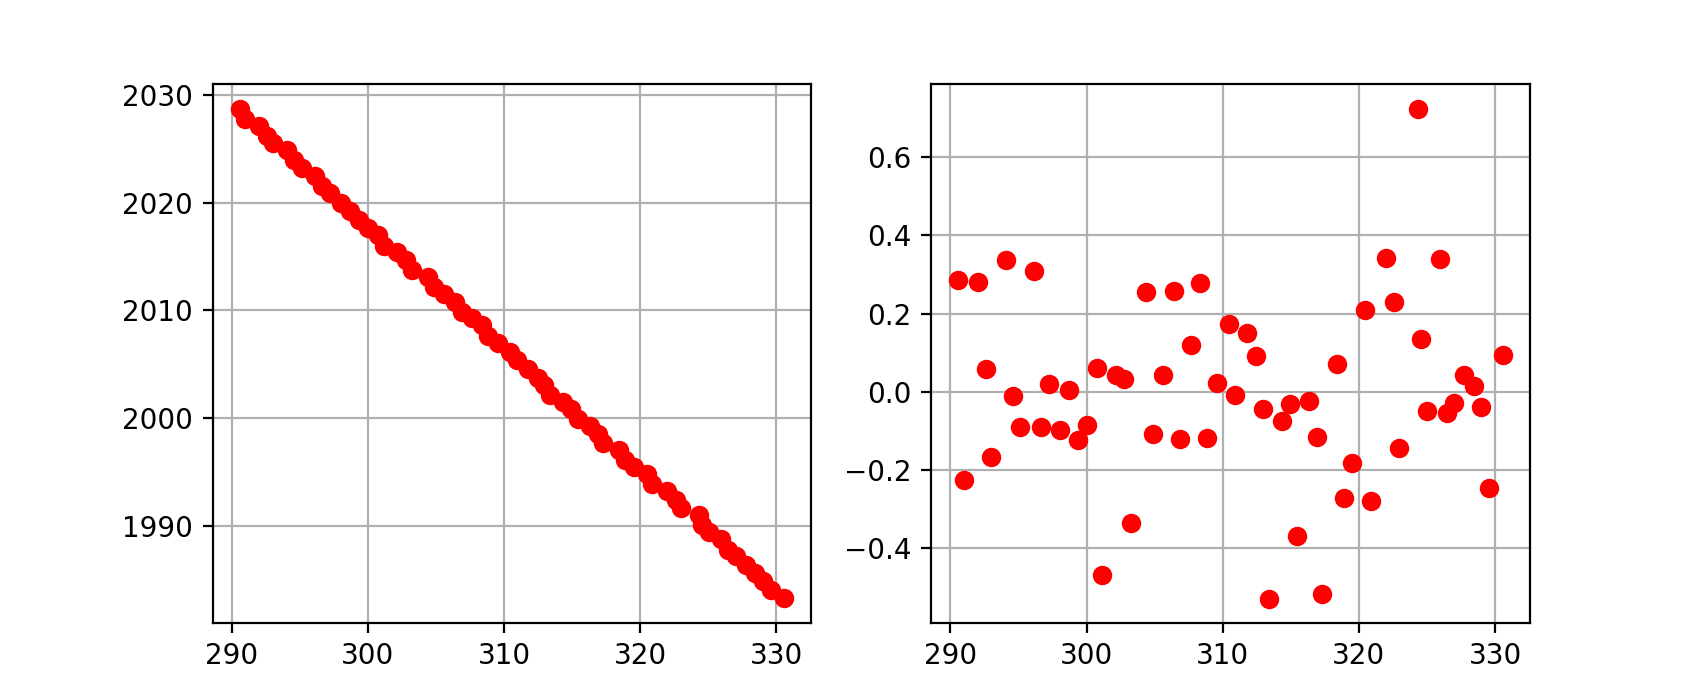

In [6]:
x0 = 290
y0 = 2028
plot_residuals(x0, y0, table_list)

<IPython.core.display.Javascript object>


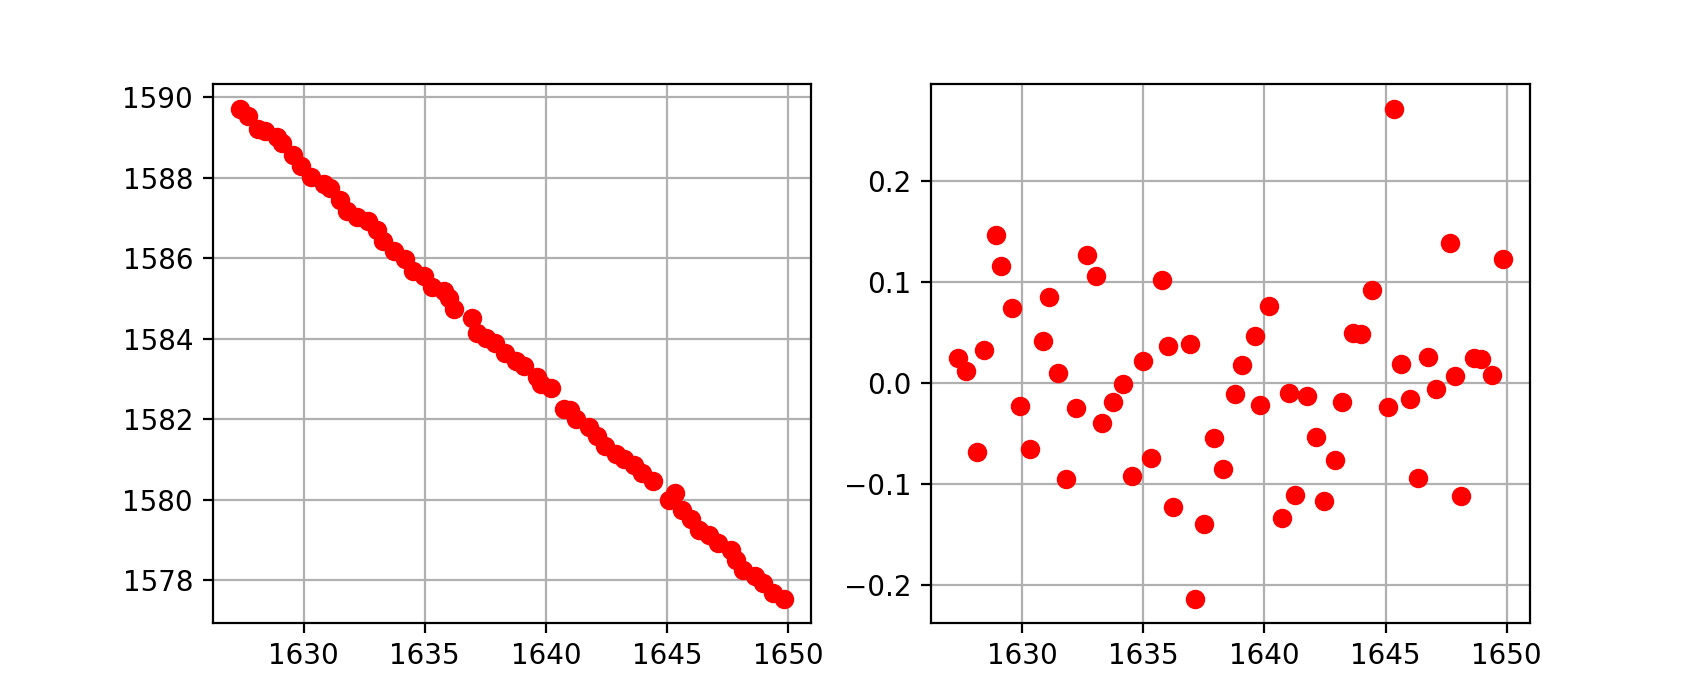

In [7]:
x0 = 1627
y0 = 1589
plot_residuals(x0, y0, table_list)

<IPython.core.display.Javascript object>


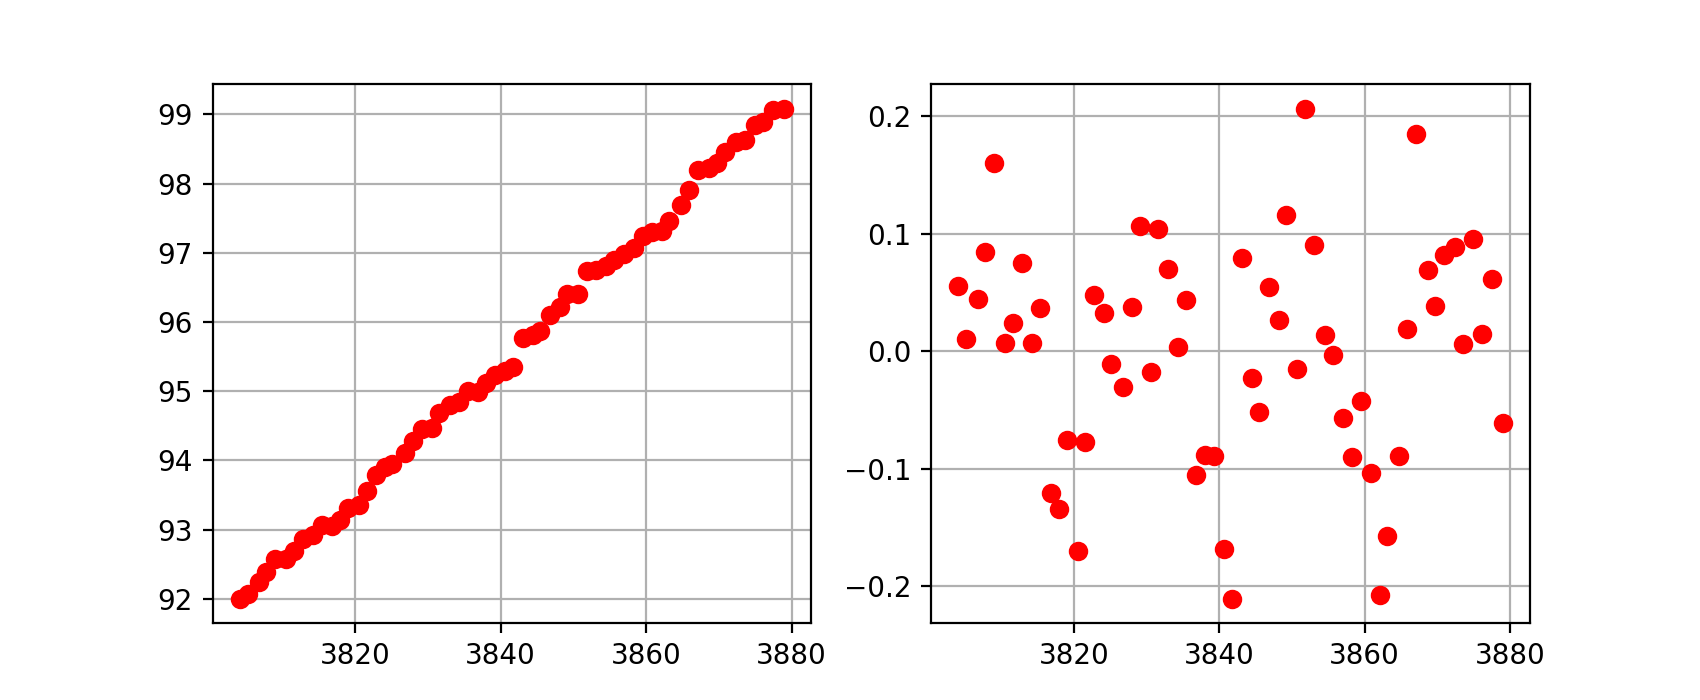

In [9]:
x0 = 3804
y0 = 91
plot_residuals(x0, y0, table_list)

<IPython.core.display.Javascript object>


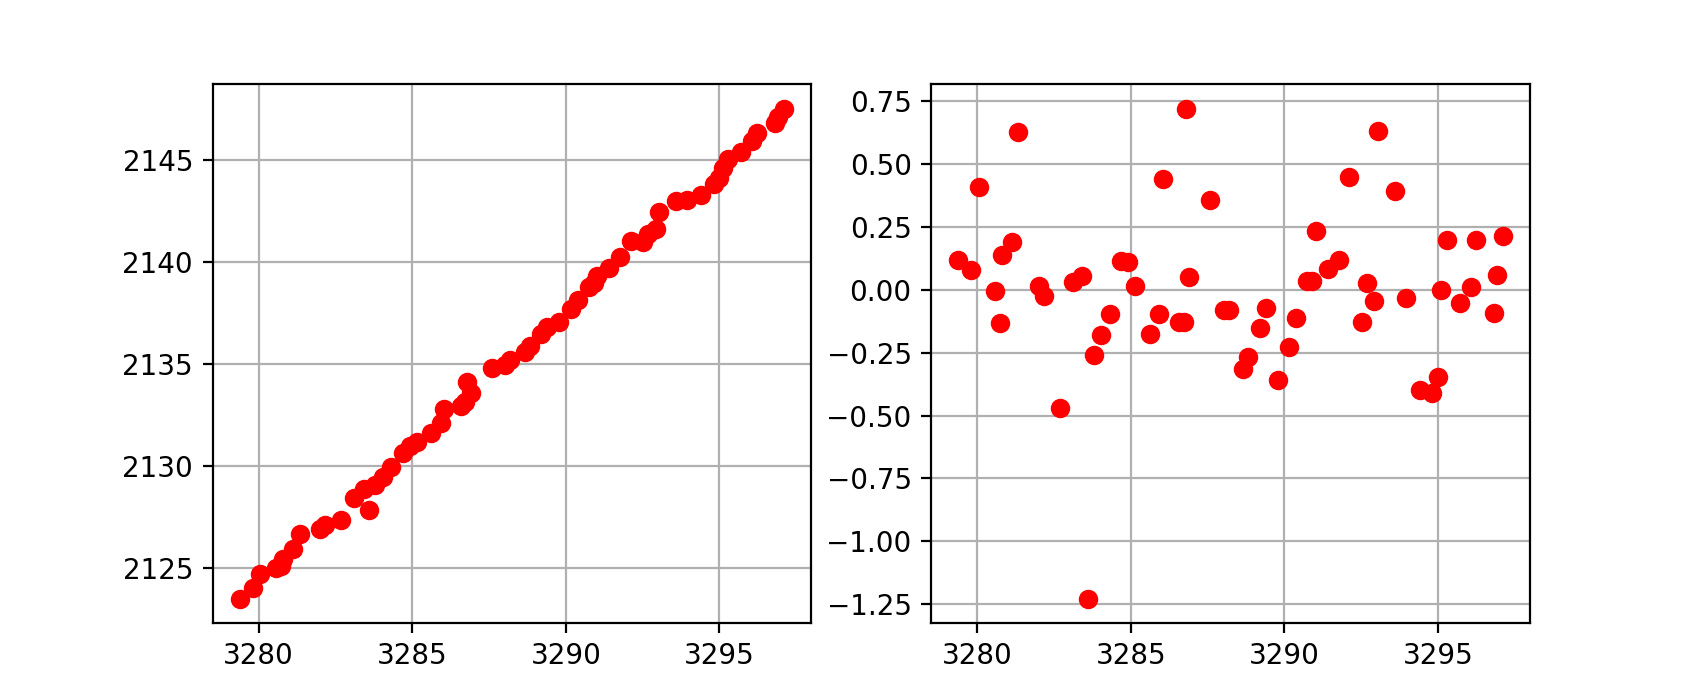

In [10]:
x0 = 3279
y0 = 2123
plot_residuals(x0, y0, table_list)

<IPython.core.display.Javascript object>


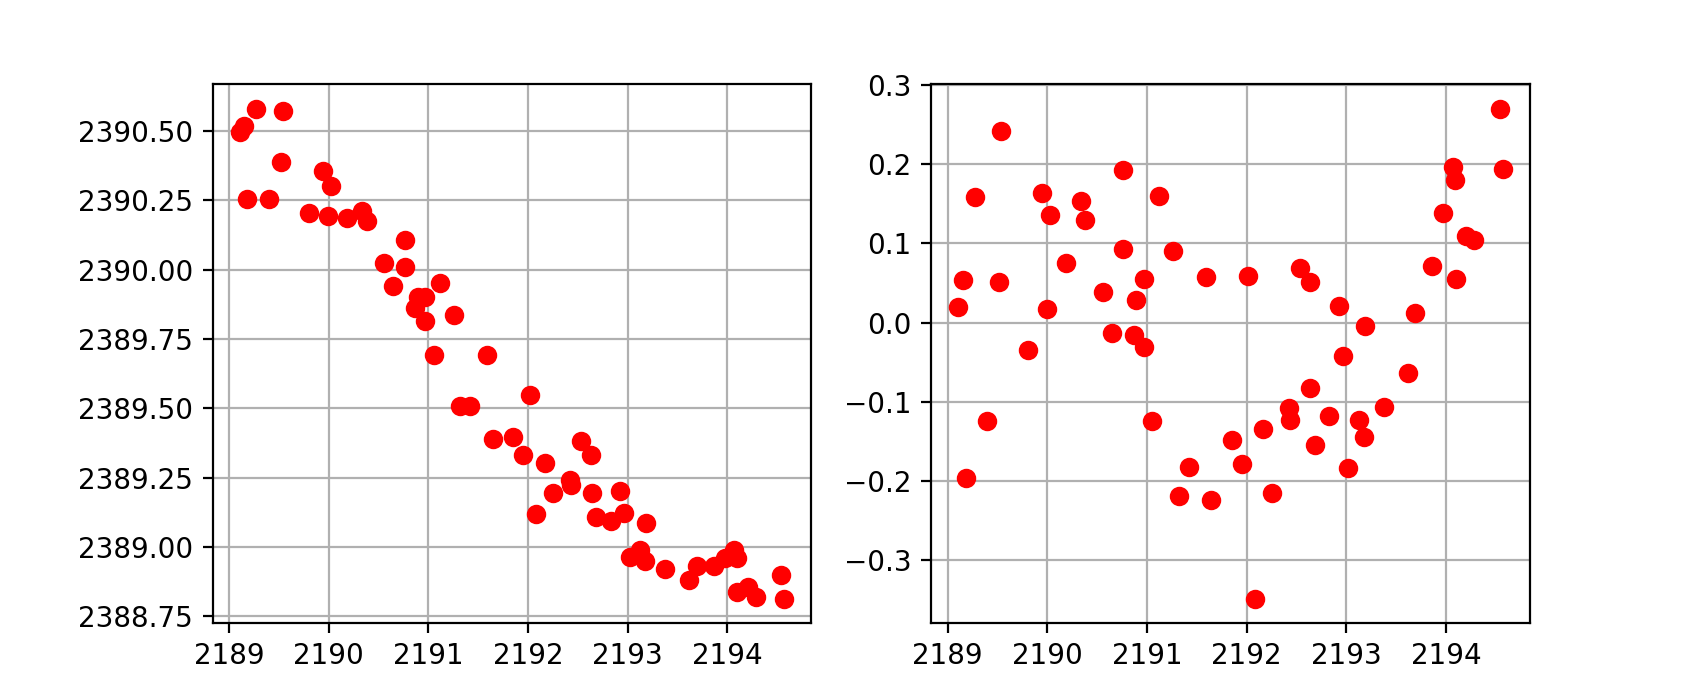

In [11]:
x0 = 2189
y0 = 2390
plot_residuals(x0, y0, table_list)

<IPython.core.display.Javascript object>


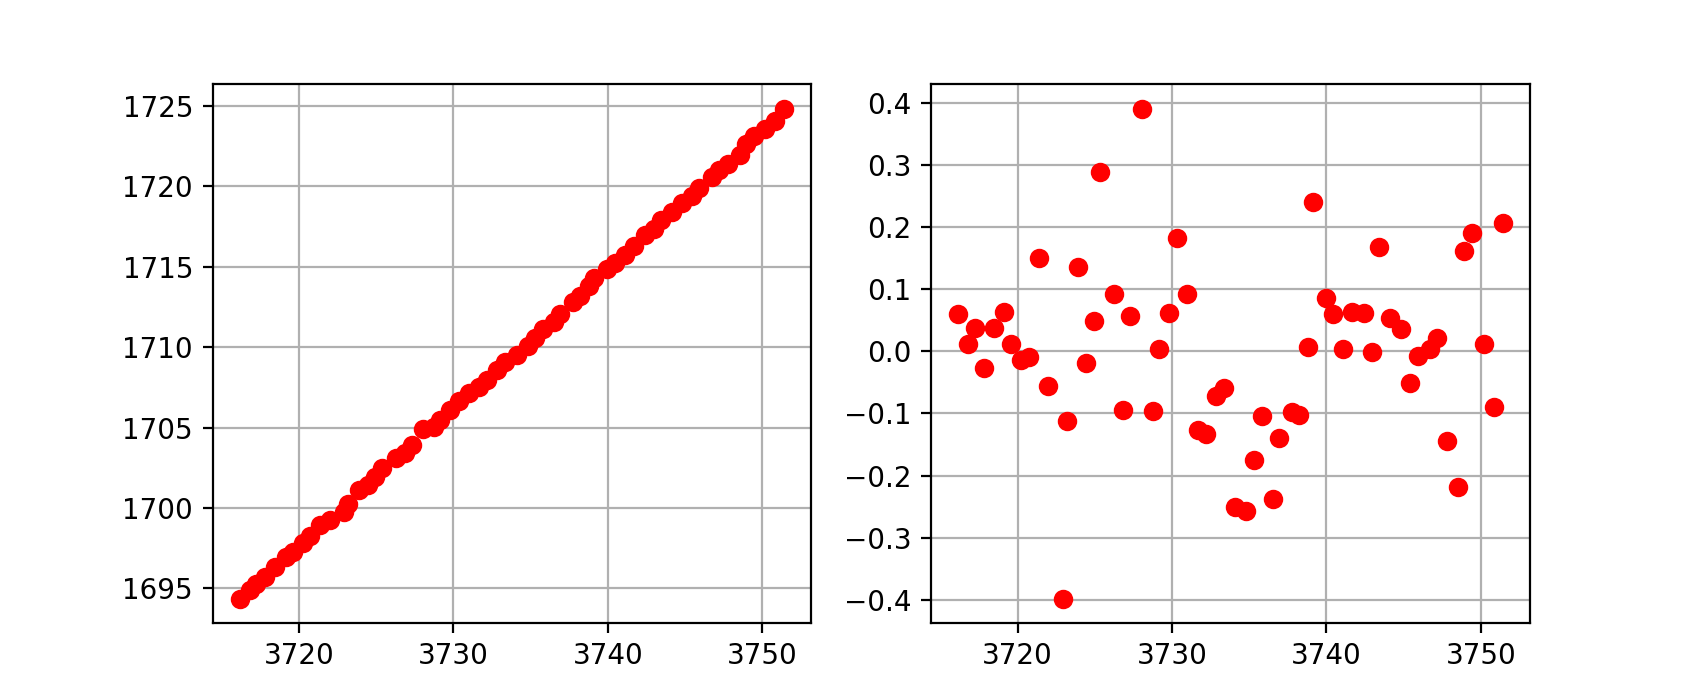

In [12]:
x0 = 3716
y0 = 1694
plot_residuals(x0, y0, table_list)